In [0]:
#Gaussian Bayes Classification
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

In [5]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


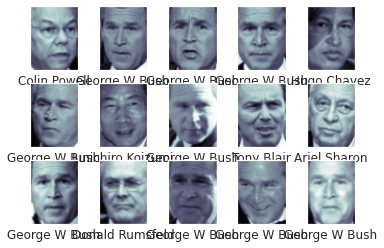

In [0]:
fig, ax = plt.subplots(3,5)
for i , axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap= 'bone')
    axi.set(xticks = [], yticks = [],
            xlabel = faces.target_names[faces.target[i]])

In [0]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca, svc) 

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data,faces.target,
                                                random_state = 42)

In [0]:
param_grid = {'svc__C':[1,5, 10, 50],
              'svc__gamma': [0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model, param_grid)

In [11]:
%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)

CPU times: user 1min 12s, sys: 16.8 s, total: 1min 29s
Wall time: 55.6 s
{'svc__C': 10, 'svc__gamma': 0.001}


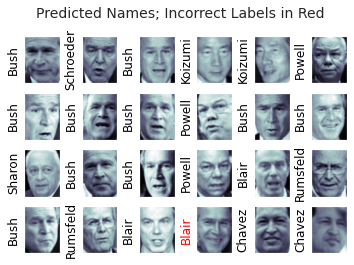

In [15]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

fig, ax = plt.subplots(4,6)
for i , axi in  enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap = 'bone')
    axi.set(xticks = [], yticks = [])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = 'black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size = 14);

In [16]:
from sklearn.metrics import classification_report
print(classification_report(yfit,ytest,target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.65      0.69        17
     Colin Powell       0.87      0.80      0.83        74
  Donald Rumsfeld       0.84      0.74      0.79        35
    George W Bush       0.83      0.92      0.88       114
Gerhard Schroeder       0.83      0.86      0.84        22
      Hugo Chavez       0.70      0.93      0.80        15
Junichiro Koizumi       1.00      0.92      0.96        13
       Tony Blair       0.95      0.85      0.90        47

         accuracy                           0.85       337
        macro avg       0.84      0.83      0.84       337
     weighted avg       0.85      0.85      0.85       337



ERROR! Session/line number was not unique in database. History logging moved to new session 59


Text(89.18, 0.5, 'predicted label')

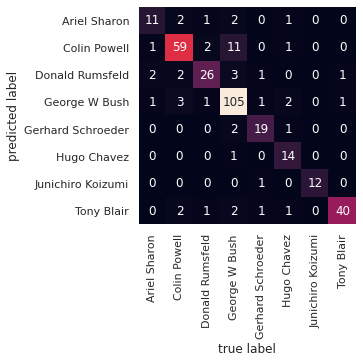

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,yfit)
sns.heatmap(mat.T,square = True, annot= True, fmt = 'd',cbar= False,
            xticklabels = faces.target_names,
            yticklabels = faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')